In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Se você fez upload direto:
try:
    df = pd.read_csv('XboxOne_GameSales.csv', encoding='utf-8', delimiter=';')
except UnicodeDecodeError:
    df = pd.read_csv('XboxOne_GameSales.csv', encoding='latin1', delimiter=';')

In [2]:
# Ver primeiras linhas
df.head()

# Verificar colunas e tipos
df.info()

# Ver estatísticas descritivas
df.describe(include='all')

# Verificar valores ausentes
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pos            613 non-null    int64  
 1   Game           613 non-null    object 
 2   Year           504 non-null    float64
 3   Genre          612 non-null    object 
 4   Publisher      504 non-null    object 
 5   North America  612 non-null    float64
 6   Europe         612 non-null    float64
 7   Japan          612 non-null    float64
 8   Rest of World  612 non-null    float64
 9   Global         612 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 48.0+ KB


,0
Pos,0
Game,0
Year,109
Genre,1
Publisher,109
North America,1
Europe,1
Japan,1
Rest of World,1
Global,1


In [ ]:
# Verifica se a coluna 'Year' existe e não é numérica
if 'Year' in df.columns:
    # Tenta converter para numérico, valores não convertíveis viram NaN
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    # Preenche NaN com um valor apropriado (por exemplo, a moda ou a média, ou remove)
    # Por exemplo, preencher com a moda e converter para int
    if df['Year'].isnull().any():
        mode_year = df['Year'].mode()[0]
        df['Year'].fillna(mode_year, inplace=True)
    df['Year'] = df['Year'].astype(int)
    print("\nTipo da coluna 'Year' após conversão:")
    print(df['Year'].dtype)

# Vendas Globais ao longo dos anos

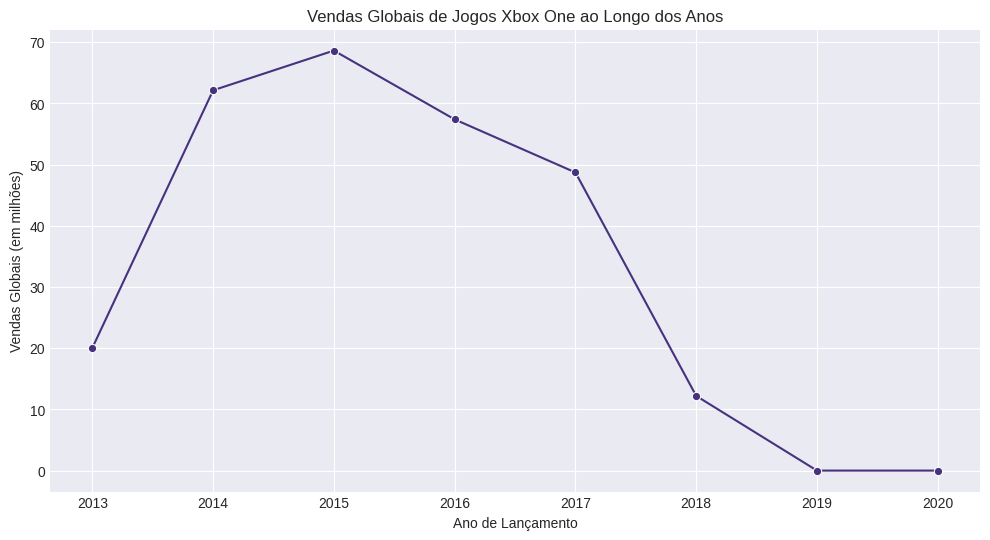

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhor visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('viridis') # Escolha uma paleta de cores

plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('Year')['Global'].sum().reset_index(), x='Year', y='Global', marker='o')
plt.title('Vendas Globais de Jogos Xbox One ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Globais (em milhões)')
plt.grid(True)
plt.show()


# Top 10 Gêneros por Vendas Globais


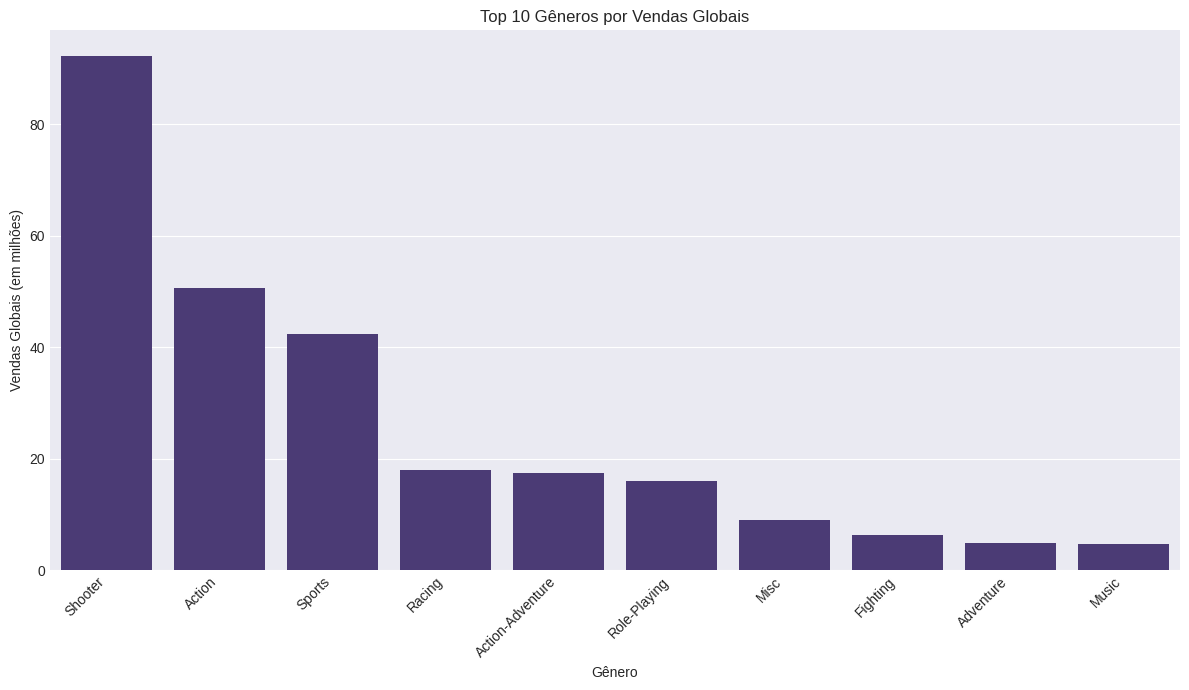

In [8]:
plt.figure(figsize=(12, 7))
top_genres = df.groupby('Genre')['Global'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 10 Gêneros por Vendas Globais')
plt.xlabel('Gênero')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Top 10 Publishers por Vendas Globais

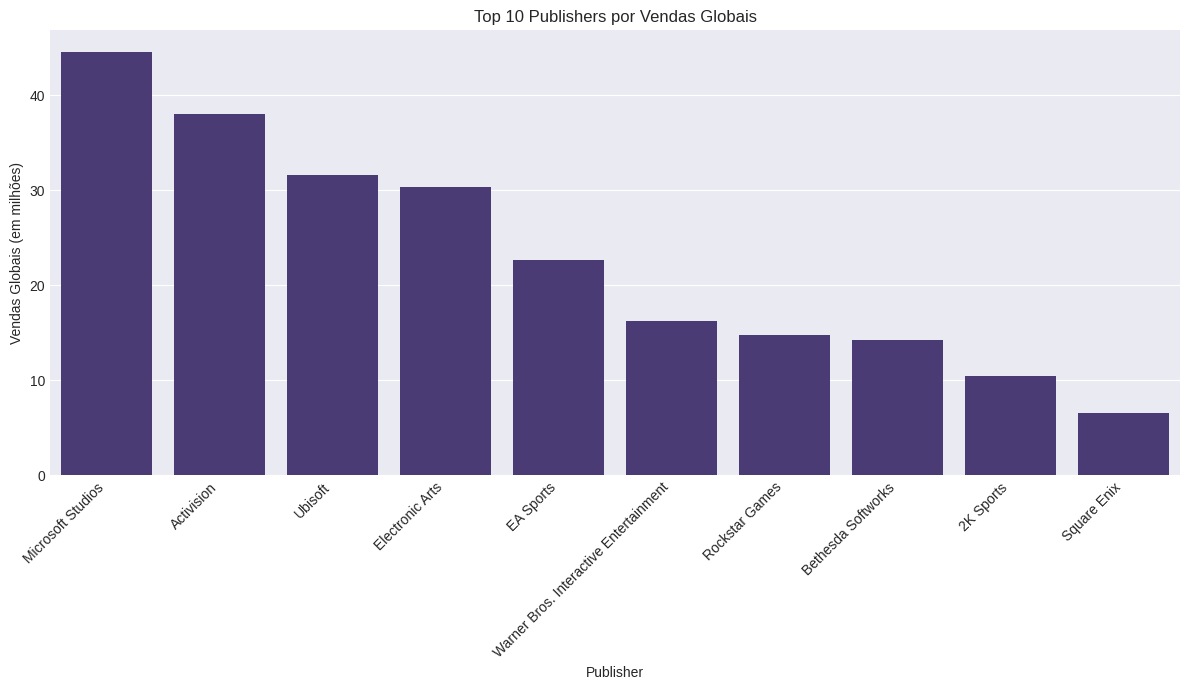

In [7]:
plt.figure(figsize=(12, 7))
top_publishers = df.groupby('Publisher')['Global'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title('Top 10 Publishers por Vendas Globais')
plt.xlabel('Publisher')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Distribuição das vendas por região

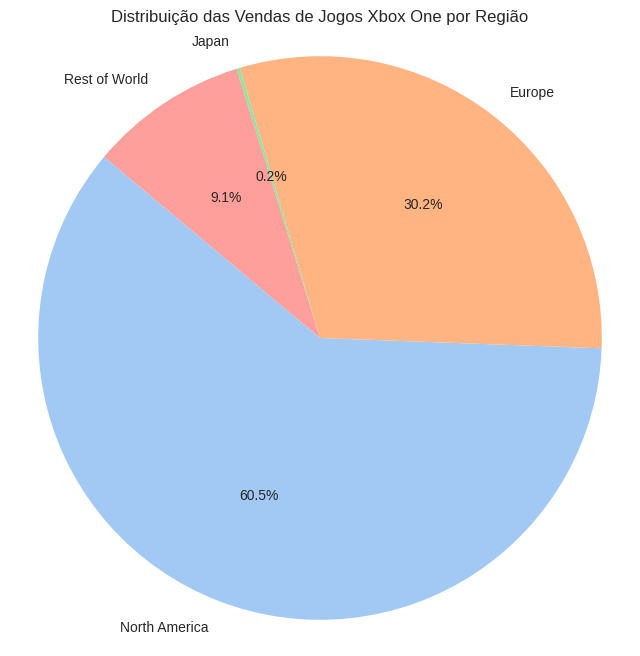

In [6]:
sales_by_region = df[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
plt.figure(figsize=(8, 8))
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribuição das Vendas de Jogos Xbox One por Região')
plt.axis('equal') # Garante que o círculo seja desenhado perfeitamente
plt.show()


# Vendas Médias por Gênero


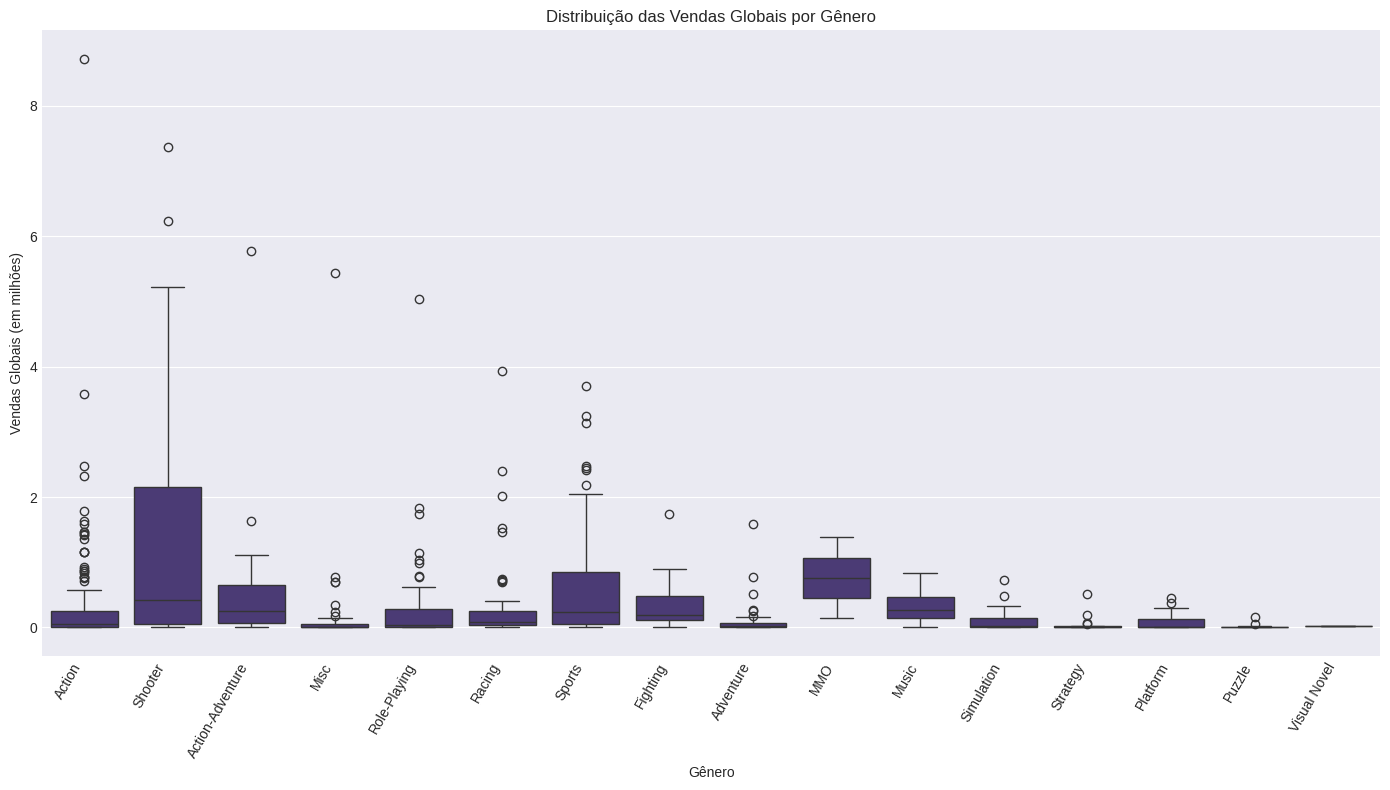

In [5]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Genre', y='Global', data=df)
plt.title('Distribuição das Vendas Globais por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

"Observamos que as vendas globais de jogos Xbox One atingiram o pico em 2015 e começaram a declinar a partir de 2016. O gênero Shooter consistently apresenta as maiores vendas, enquanto Microsoft Studios é a publisher dominante no dataset, lançando vários títulos de sucesso. A América do Norte é claramente o maior mercado para jogos Xbox One, representando 60,5% das vendas globais."